[View in Colaboratory](https://colab.research.google.com/github/andersy005/video-game-graphics-to-reality-and-back/blob/master/image_translation.ipynb)

# Install Colaboratory Tools

In [95]:
!pip install git+https://github.com/andersy005/colaboratory-tools.git --no-cache-dir --upgrade

  Cloning https://github.com/andersy005/colaboratory-tools.git to /tmp/pip-drfs62u6-build
Requirement already up-to-date: pillow==4.0.0 in /usr/local/lib/python3.6/dist-packages (from colabtools==0.0.1)
Requirement already up-to-date: scikit-image in /usr/local/lib/python3.6/dist-packages (from colabtools==0.0.1)
    100% |████████████████████████████████| 184kB 5.7MB/s 
Requirement already up-to-date: tensorboardX in /usr/local/lib/python3.6/dist-packages (from colabtools==0.0.1)
    44% |██████████████▏                 | 220.6MB 38.0MB/s eta 0:00:08

    100% |████████████████████████████████| 496.4MB 40.7MB/s 
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (from colabtools==0.0.1)
Requirement already up-to-date: olefile in /usr/local/lib/python3.6/dist-packages (from pillow==4.0.0->colabtools==0.0.1)
    100% |████████████████████████████████| 50.0MB 38.0MB/s 
    100% |████████████████████████████████| 12.6MB 40.3MB/s 
Requirement already up-to-date: networkx>=1.8 in /usr/local/lib/python3.6/dist-packages (from scikit-image->colabtools==0.0.1)
Requirement already up-to-date: six>=1.7.3 in /usr/local/lib/python3.6/dist-packages (from scikit-image->colabtools==0.0.1)
Requirement already up-to-date: PyWavelets>=0.4.0 in /usr/local/lib/python3.6/dist-packages (from scikit-image->colabtools==0.0.1)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (from tensorboardX->colabtools==0.0.1)
    100% |████████████████████████████████| 6.4MB 32.1MB/s 
    100% |████████████

  Running setup.py install for seaborn ... - \ | done
  Found existing installation: PyYAML 3.11
    Uninstalling PyYAML-3.11:
      Successfully uninstalled PyYAML-3.11
  Running setup.py install for pyyaml ... - \ done
  Found existing installation: torch 0.3.0.post4
    Uninstalling torch-0.3.0.post4:
      Successfully uninstalled torch-0.3.0.post4
  Found existing installation: colabtools 0.0.1
    Uninstalling colabtools-0.0.1:
      Successfully uninstalled colabtools-0.0.1
  Running setup.py install for colabtools ... - done
  Found existing installation: scipy 0.19.1
    Uninstalling scipy-0.19.1:
      Successfully uninstalled scipy-0.19.1
  Found existing installation: pytz 2016.7
    Uninstalling pytz-2016.7:
      Successfully uninstalled pytz-2016.7
  Found existing installation: setuptools 36.2.7
    Not uninstalling setuptools at /usr/lib/python3/dist-packages, outside environment /usr
  Found existing installation: python-dateutil 2.5.3
    Uninstalling pyt

# Load Data

Check to see if the data is already available. If not, download the data from google drive and extract the files from compressed files.

In [0]:
%%bash
if [ ! -f gta.tar.gz ]; then
  echo "File not found!"
 
  wget --header 'Host: doc-0o-58-docs.googleusercontent.com' --user-agent 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:59.0) Gecko/20100101 Firefox/59.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://drive.google.com/drive/u/1/folders/1B56WZ20ODejt7MAwFr0a2HnMJ0fz4VlN' --header 'Cookie: AUTH_e1273drrbkihn7uunefac5g2nh6fppao=07610261954870412584|1523390400000|kf36r1s9jup16ems1p1f2sckdgrlvbhm; NID=123=lBPWjtG4k1sU7Dd0qsq5jpbqEiDrMBU8x0r6kdqXBCf-pCwxt9y7UdTTVaEFzLR7u5w-wq6dp0xKDTIsDb6QCnL0jNICERWUAuRHrxjQlpzo8gI8bqEpJJBDhN1T2RNR' --header 'DNT: 1' --header 'Upgrade-Insecure-Requests: 1' 'https://doc-0o-58-docs.googleusercontent.com/docs/securesc/u8k4a259k8v0rijo1dv2q4t69g74544s/il57erfe3koja1994495ashvpr49mjfs/1523390400000/07610261954870412584/07610261954870412584/1gKCTPV_pCWaIEuiQ5IWP8rQSh040ezOL?h=11006290462901738094&e=download' --output-document 'city.tar.gz'
  wget --header 'Host: doc-14-58-docs.googleusercontent.com' --user-agent 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:59.0) Gecko/20100101 Firefox/59.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://drive.google.com/drive/u/1/folders/1B56WZ20ODejt7MAwFr0a2HnMJ0fz4VlN' --header 'Cookie: AUTH_e1273drrbkihn7uunefac5g2nh6fppao=07610261954870412584|1523390400000|kf36r1s9jup16ems1p1f2sckdgrlvbhm; NID=123=lBPWjtG4k1sU7Dd0qsq5jpbqEiDrMBU8x0r6kdqXBCf-pCwxt9y7UdTTVaEFzLR7u5w-wq6dp0xKDTIsDb6QCnL0jNICERWUAuRHrxjQlpzo8gI8bqEpJJBDhN1T2RNR' --header 'DNT: 1' --header 'Upgrade-Insecure-Requests: 1' 'https://doc-14-58-docs.googleusercontent.com/docs/securesc/u8k4a259k8v0rijo1dv2q4t69g74544s/3le4pio11hb399ub230qat6883ggjv5n/1523390400000/07610261954870412584/07610261954870412584/1TxNprMLCTVnTWV9QIYDve5mv_DjOsCNb?h=11006290462901738094&e=download' --output-document 'gta.tar.gz'
  tar -zxvf gta.tar.gz
  tar -zxvf city.tar.gz
 
fi

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

from colabtools.pytorch import datasets as cds
from torch import utils

In [98]:
compose = transforms.Compose(
        [
            transforms.ToPILImage(),
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
            #transforms.Normalize((.5, .5, .5), (.5, .5, .5))
        ])
gta = cds.CustomDataset(root_dir='./gta/images/', transform=compose)
gta_loader = utils.data.DataLoader(gta, num_workers=4, shuffle=True, batch_sampler=4)
for i_batch, sample_batched in enumerate(gta_loader):
  print(i_batch, sample_batched.size())
  
  if i_batch == 3:
    cds.show_batch(sampled_batched)
    plt.show()



NameError: ignored

In [94]:
help(cds.show_batch)

AttributeError: ignored

In [0]:
from IPython import display
import torch
from torch import nn
from torch.optim import Adam 
from torch.autograd import Variable
from torchvision import transforms, datasets

In [0]:
GTA_FOLDER ='./gta/images/'
CITY_FOLDER = './city_real/'

In [0]:

# Load Data

In [0]:
import sys
import torch
from torchvision import datasets
from torchvision import transforms
import os
import matplotlib.pyplot as plt

In [0]:
import torch.nn as nn
import torch.nn.functional as F


def deconv(c_in, c_out, k_size, stride=2, pad=1, bn=True):
    """Custom deconvolutional layer for simplicity."""
    layers = []
    layers.append(nn.ConvTranspose2d(c_in, c_out, k_size, stride, pad, bias=False))
    if bn:
        layers.append(nn.BatchNorm2d(c_out))
    return nn.Sequential(*layers)

def conv(c_in, c_out, k_size, stride=2, pad=1, bn=True):
    """Custom convolutional layer for simplicity."""
    layers = []
    layers.append(nn.Conv2d(c_in, c_out, k_size, stride, pad, bias=False))
    if bn:
        layers.append(nn.BatchNorm2d(c_out))
    return nn.Sequential(*layers)

class G12(nn.Module):
    """Generator for transfering from mnist to svhn"""
    def __init__(self, conv_dim=64):
        super(G12, self).__init__()
        # encoding blocks
        self.conv1 = conv(3, conv_dim, 4)
        self.conv2 = conv(conv_dim, conv_dim*2, 4)
        
        # residual blocks
        self.conv3 = conv(conv_dim*2, conv_dim*2, 3, 1, 1)
        self.conv4 = conv(conv_dim*2, conv_dim*2, 3, 1, 1)
        
        # decoding blocks
        self.deconv1 = deconv(conv_dim*2, conv_dim, 4)
        self.deconv2 = deconv(conv_dim, 3, 4, bn=False)
        
    def forward(self, x):
        out = F.leaky_relu(self.conv1(x), 0.05)      # (?, 64, 16, 16)
        out = F.leaky_relu(self.conv2(out), 0.05)    # (?, 128, 8, 8)
        
        out = F.leaky_relu(self.conv3(out), 0.05)    # ( " )
        out = F.leaky_relu(self.conv4(out), 0.05)    # ( " )
        
        out = F.leaky_relu(self.deconv1(out), 0.05)  # (?, 64, 16, 16)
        out = F.tanh(self.deconv2(out))              # (?, 3, 32, 32)
        return out
    
class G21(nn.Module):
    """Generator for transfering from svhn to mnist"""
    def __init__(self, conv_dim=64):
        super(G21, self).__init__()
        # encoding blocks
        self.conv1 = conv(3, conv_dim, 4)
        self.conv2 = conv(conv_dim, conv_dim*2, 4)
        
        # residual blocks
        self.conv3 = conv(conv_dim*2, conv_dim*2, 3, 1, 1)
        self.conv4 = conv(conv_dim*2, conv_dim*2, 3, 1, 1)
        
        # decoding blocks
        self.deconv1 = deconv(conv_dim*2, conv_dim, 4)
        self.deconv2 = deconv(conv_dim, 3, 4, bn=False)
        
    def forward(self, x):
        out = F.leaky_relu(self.conv1(x), 0.05)      # (?, 64, 16, 16)
        out = F.leaky_relu(self.conv2(out), 0.05)    # (?, 128, 8, 8)
        
        out = F.leaky_relu(self.conv3(out), 0.05)    # ( " )
        out = F.leaky_relu(self.conv4(out), 0.05)    # ( " )
        
        out = F.leaky_relu(self.deconv1(out), 0.05)  # (?, 64, 16, 16)
        out = F.tanh(self.deconv2(out))              # (?, 1, 32, 32)
        return out
    
class D1(nn.Module):
    """Discriminator for mnist."""
    def __init__(self, conv_dim=64, use_labels=False):
        super(D1, self).__init__()
        self.conv1 = conv(3, conv_dim, 4, bn=False)
        self.conv2 = conv(conv_dim, conv_dim*2, 4)
        self.conv3 = conv(conv_dim*2, conv_dim*4, 4)
        n_out = 11 if use_labels else 1
        self.fc = conv(conv_dim*4, n_out, 4, 1, 0, False)
        
    def forward(self, x):
        out = F.leaky_relu(self.conv1(x), 0.05)    # (?, 64, 16, 16)
        out = F.leaky_relu(self.conv2(out), 0.05)  # (?, 128, 8, 8)
        out = F.leaky_relu(self.conv3(out), 0.05)  # (?, 256, 4, 4)
        out = self.fc(out).squeeze()
        return out

class D2(nn.Module):
    """Discriminator for svhn."""
    def __init__(self, conv_dim=64, use_labels=False):
        super(D2, self).__init__()
        self.conv1 = conv(3, conv_dim, 4, bn=False)
        self.conv2 = conv(conv_dim, conv_dim*2, 4)
        self.conv3 = conv(conv_dim*2, conv_dim*4, 4)
        n_out = 11 if use_labels else 1
        self.fc = conv(conv_dim*4, n_out, 4, 1, 0, False)
        
    def forward(self, x):
        out = F.leaky_relu(self.conv1(x), 0.05)    # (?, 64, 16, 16)
        out = F.leaky_relu(self.conv2(out), 0.05)  # (?, 128, 8, 8)
        out = F.leaky_relu(self.conv3(out), 0.05)  # (?, 256, 4, 4)
        out = self.fc(out).squeeze()
        return out

In [0]:
# Script to load, process/augment data from GTA5 and CityScape datasets.abs
# License: MIT
# Author: Anderson Banihirwe

import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from skimage import io
import pathlib
import os


class Config:
    """Configuration class that
    contains needed configuration settings."""
    def __init__(self, gta='./gta/images/',
                 city='./city_real/',
                 image_size=32, g_conv_dim=64, d_conv_dim=64,
                 use_reconst_loss=True, use_labels=False, num_classes=None,
                 train_iters=20, batch_size=64, num_workers=4, lr=0.0002,
                 beta1=0.5, beta2=0.999, mode='train', model_path='models',
                 sample_path='samples', log_step=10, sample_step=10):
        self.gta_path = gta
        self.city_path = city
        self.image_size = image_size
        self.g_conv_dim = g_conv_dim
        self.d_conv_dim = d_conv_dim
        self.use_reconst_loss = use_reconst_loss
        self.train_iters = train_iters
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.beta1 = beta1
        self.beta2 = beta2
        self.mode = mode
        self.model_path = model_path
        self.sample_path = sample_path
        self.log_step = log_step
        self.sample_step = sample_step
        self.use_labels = use_labels
        self.num_classes = num_classes
        self.lr = lr


class CustomDataset(Dataset):
    """Create a custom dataset object."""
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.files = os.listdir(root_dir)

    def __len__(self):
        return len(os.listdir(self.root_dir))

    def __getitem__(self, idx):
        img_name = self.root_dir/self.files[idx]
        image = io.imread(img_name)
        if self.transform:
            image = self.transform(image)
        return image


def get_loader(config, transfms=None):
    """Builds and returns Dataloader for GTA5 and CityScape dataset."""
    gta_path = pathlib.Path(config.gta_path)
    city_path = pathlib.Path(config.city_path)

    gta_dataset = CustomDataset(gta_path, transfms)
    city_dataset = CustomDataset(city_path, transfms)
    
    dataloader_gta = DataLoader(gta_dataset, batch_size=config.batch_size, shuffle=True, num_workers=config.num_workers)
    dataloader_city = DataLoader(city_dataset, batch_size=config.batch_size, shuffle=True, num_workers=config.num_workers)

    return dataloader_gta, dataloader_city

In [0]:
import torch
import torch.nn as nn
import torchvision
import os
import pickle
import scipy.io
import numpy as np

from torch.autograd import Variable
from torch import optim
from torchvision import transforms, utils
#from models.model import G12, G21
#from models.model import D1, D2


class Solver(object):
    def __init__(self, config, gta_loader, city_loader):
        self.gta_loader = gta_loader
        self.city_loader = city_loader
        self.g12 = None
        self.g21 = None
        self.d1 = None
        self.d2 = None
        self.g_optimizer = None
        self.d_optimizer = None
        self.use_reconst_loss = config.use_reconst_loss
        self.use_labels = config.use_labels
        self.num_classes = config.num_classes
        self.beta1 = config.beta1
        self.beta2 = config.beta2
        self.g_conv_dim = config.g_conv_dim
        self.d_conv_dim = config.d_conv_dim
        self.train_iters = config.train_iters
        self.batch_size = config.batch_size
        self.lr = config.lr
        self.log_step = config.log_step
        self.sample_step = config.sample_step
        self.sample_path = config.sample_path
        self.model_path = config.model_path
        self.build_model()
        
    def build_model(self):
        """Builds a generator and a discriminator."""
        self.g12 = G12(conv_dim=self.g_conv_dim)
        self.g21 = G21(conv_dim=self.g_conv_dim)
        self.d1 = D1(conv_dim=self.d_conv_dim, use_labels=self.use_labels)
        self.d2 = D2(conv_dim=self.d_conv_dim, use_labels=self.use_labels)
        
        g_params = list(self.g12.parameters()) + list(self.g21.parameters())
        d_params = list(self.d1.parameters()) + list(self.d2.parameters())
        
        self.g_optimizer = optim.Adam(g_params, self.lr, [self.beta1, self.beta2])
        self.d_optimizer = optim.Adam(d_params, self.lr, [self.beta1, self.beta2])
        
        if torch.cuda.is_available():
            self.g12.cuda()
            self.g21.cuda()
            self.d1.cuda()
            self.d2.cuda()
    
    def merge_images(self, sources, targets, k=10):
        _, _, h, w = sources.shape
        row = int(np.sqrt(self.batch_size))
        merged = np.zeros([3, row*h, row*w*2])
        for idx, (s, t) in enumerate(zip(sources, targets)):
            i = idx // row
            j = idx % row
            merged[:, i*h:(i+1)*h, (j*2)*h:(j*2+1)*h] = s
            merged[:, i*h:(i+1)*h, (j*2+1)*h:(j*2+2)*h] = t
        return merged.transpose(1, 2, 0)
    
    def to_var(self, x):
        """Converts numpy to variable."""
        if torch.cuda.is_available():
            x = x.cuda()
        return Variable(x)
    
    def to_data(self, x):
        """Converts variable to numpy."""
        if torch.cuda.is_available():
            x = x.cpu()
        return x.data.numpy()
    
    def reset_grad(self):
        """Zeros the gradient buffers."""
        self.g_optimizer.zero_grad()
        self.d_optimizer.zero_grad()

    def train(self):
        gta_iter = iter(self.gta_loader)
        city_iter = iter(self.city_loader)
        iter_per_epoch = min(len(gta_iter), len(city_iter))
        
        # fixed city and gta for sampling
        fixed_gta = self.to_var(gta_iter.next())
        fixed_city = self.to_var(city_iter.next())
        
        # loss if use_labels = True
        criterion = nn.CrossEntropyLoss()
        
        for step in range(self.train_iters+1):
            # reset data_iter for each epoch
            if (step+1) % iter_per_epoch == 0:
                city_iter = iter(self.city_loader)
                gta_iter = iter(self.gta_loader)
            
            # load gta and city dataset
            gta = gta_iter.next() 
            gta = self.to_var(gta)
            city = city_iter.next() 
            city = self.to_var(city)

            if self.use_labels:
                city_fake_labels = self.to_var(
                    torch.Tensor([self.num_classes]*gta.size(0)).long())
                gta_fake_labels = self.to_var(
                    torch.Tensor([self.num_classes]*city.size(0)).long())
            
            #============ train D ============#
            
            # train with real images
            self.reset_grad()
            out = self.d1(city)
            if self.use_labels:
                d1_loss = criterion(out, m_labels)
            else:
                d1_loss = torch.mean((out-1)**2)
            
            out = self.d2(gta)
            if self.use_labels:
                d2_loss = criterion(out, s_labels)
            else:
                d2_loss = torch.mean((out-1)**2)
            
            d_city_loss = d1_loss
            d_gta_loss = d2_loss
            d_real_loss = d1_loss + d2_loss
            d_real_loss.backward()
            self.d_optimizer.step()
            
            # train with fake images
            self.reset_grad()
            fake_gta = self.g12(city)
            out = self.d2(fake_gta)
            if self.use_labels:
                d2_loss = criterion(out, gta_fake_labels)
            else:
                d2_loss = torch.mean(out**2)
            
            fake_city = self.g21(gta)
            out = self.d1(fake_city)
            if self.use_labels:
                d1_loss = criterion(out, city_fake_labels)
            else:
                d1_loss = torch.mean(out**2)
            
            d_fake_loss = d1_loss + d2_loss
            d_fake_loss.backward()
            self.d_optimizer.step()
            
            #============ train G ============#
            
            # train city-gta-city cycle
            self.reset_grad()
            fake_gta = self.g12(city)
            out = self.d2(fake_gta)
            reconst_city = self.g21(fake_gta)
            if self.use_labels:
                g_loss = criterion(out, m_labels) 
            else:
                g_loss = torch.mean((out-1)**2) 

            if self.use_reconst_loss:
                g_loss += torch.mean((city - reconst_city)**2)

            g_loss.backward()
            self.g_optimizer.step()

            # train gta-city-gta cycle
            self.reset_grad()
            fake_city = self.g21(gta)
            out = self.d1(fake_city)
            reconst_gta = self.g12(fake_city)
            if self.use_labels:
                g_loss = criterion(out, s_labels) 
            else:
                g_loss = torch.mean((out-1)**2) 

            if self.use_reconst_loss:
                g_loss += torch.mean((gta - reconst_gta)**2)

            g_loss.backward()
            self.g_optimizer.step()
            
            # print the log info
            if (step+1) % self.log_step == 0:
                print('Step [%d/%d], d_real_loss: %.4f, d_city_loss: %.4f, d_gta_loss: %.4f, '
                      'd_fake_loss: %.4f, g_loss: %.4f' 
                      %(step+1, self.train_iters, d_real_loss.data[0], d_city_loss.data[0], 
                        d_gta_loss.data[0], d_fake_loss.data[0], g_loss.data[0]))

            # save the sampled images
            if (step+1) % self.sample_step == 0:
                fake_gta = self.g12(fixed_city)
                fake_city = self.g21(fixed_gta)
                
                city, fake_city = self.to_data(fixed_city), self.to_data(fake_city)
                gta , fake_gta = self.to_data(fixed_gta), self.to_data(fake_gta)
                
                merged = self.merge_images(city, fake_gta)
                path = os.path.join(self.sample_path, 'sample-%d-m-s.png' %(step+1))
                path2 = os.path.join(self.sample_path, 'sample2-%d-m-s.png' %(step+1))
                path3 = os.path.join(self.sample_path, 'sample3-%d-m-s.png' %(step+1))
                path4 = os.path.join(self.sample_path, 'sample4-%d-m-s.png' %(step+1))
                path5 = os.path.join(self.sample_path, 'sample5-%d-m-s.png' %(step+1))
               
                scipy.misc.imshow(city.transpose(0, 2, 3, 1)[0])
                scipy.misc.imshow(fake_city.transpose(0, 2, 3, 1)[0])
                scipy.misc.imshow(gta.transpose(0, 2, 3, 1)[0])
                scipy.misc.imshow(fake_gta.transpose(0, 2, 3, 1)[0])
                #scipy.misc.imsave(path, merged)
                #scipy.misc.imsave(path2, city[0])
                #scipy.misc.imsave(path3, fake_gta[0])
                #scipy.misc.imsave(path4, fake_city[0])
                #scipy.misc.imsave(path5, gta[0])
                
                print ('saved %s' %path)
                
                merged = self.merge_images(gta, fake_city)
                path = os.path.join(self.sample_path, 'sample-%d-s-m.png' %(step+1))
                scipy.misc.imsave(path, merged)
                print ('saved %s' %path)
            
            if (step+1) % 20 == 0:
                # save the model parameters for each epoch
                g12_path = os.path.join(self.model_path, 'g12-%d.pkl' %(step+1))
                g21_path = os.path.join(self.model_path, 'g21-%d.pkl' %(step+1))
                d1_path = os.path.join(self.model_path, 'd1-%d.pkl' %(step+1))
                d2_path = os.path.join(self.model_path, 'd2-%d.pkl' %(step+1))
                torch.save(self.g12.state_dict(), g12_path)
                torch.save(self.g21.state_dict(), g21_path)
                torch.save(self.d1.state_dict(), d1_path)
                torch.save(self.d2.state_dict(), d2_path)

In [0]:
config = Config()

In [0]:
transfms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [0]:
gta_loader, city_loader = get_loader(config, transfms=transfms)
len(gta_loader)
def show_batch(sample_batched):
    images_batch = sample_batched
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    

In [0]:
solver = Solver(config, gta_loader, city_loader)

In [0]:
from torch.backends import cudnn
cudnn.benchmark = True

In [0]:
# create directories if not exist
if not os.path.exists(config.model_path):
    os.makedirs(config.model_path)
if not os.path.exists(config.sample_path):
    os.makedirs(config.sample_path)
    

In [25]:
solver.train()

Step [10/20], d_real_loss: 0.3977, d_city_loss: 0.2266, d_gta_loss: 0.1711, d_fake_loss: 0.3707, g_loss: 1.8532


RuntimeError: ignored

In [0]:
from IPython import display

In [29]:
import os
import numpy as np
import errno
import torchvision.utils as vutils
from tensorboardX import SummaryWriter
from IPython import display
from matplotlib import pyplot as plt
import torch

'''
    TensorBoard Data will be stored in './runs' path
'''


class Logger:

    def __init__(self, model_name, data_name):
        self.model_name = model_name
        self.data_name = data_name

        self.comment = '{}_{}'.format(model_name, data_name)
        self.data_subdir = '{}/{}'.format(model_name, data_name)

        # TensorBoard
        self.writer = SummaryWriter(comment=self.comment)

    def log(self, d_error, g_error, epoch, n_batch, num_batches):

        var_class = torch.autograd.variable.Variable
        if type(d_error)==var_class:
            d_error = d_error.data.cpu().numpy()
        if type(g_error)==var_class:
            g_error = g_error.data.cpu().numpy()

        step = Logger._step(epoch, n_batch, num_batches)
        self.writer.add_scalar(
            '{}/D_error'.format(self.comment), d_error, step)
        self.writer.add_scalar(
            '{}/G_error'.format(self.comment), g_error, step)

    def log_images(self, images, num_images, epoch, n_batch, num_batches, format='NCHW', normalize=True):
        '''
        input images are expected in format (NCHW)
        '''
        if type(images) == np.ndarray:
            images = torch.from_numpy(images)
        
        if format=='NHWC':
            images = images.transpose(1,3)
        

        step = Logger._step(epoch, n_batch, num_batches)
        img_name = '{}/images{}'.format(self.comment, '')

        # Make horizontal grid from image tensor
        horizontal_grid = vutils.make_grid(
            images, normalize=normalize, scale_each=True)
        # Make vertical grid from image tensor
        nrows = int(np.sqrt(num_images))
        grid = vutils.make_grid(
            images, nrow=nrows, normalize=True, scale_each=True)

        # Add horizontal images to tensorboard
        self.writer.add_image(img_name, horizontal_grid, step)

        # Save plots
        self.save_torch_images(horizontal_grid, grid, epoch, n_batch)

    def save_torch_images(self, horizontal_grid, grid, epoch, n_batch, plot_horizontal=True):
        out_dir = './data/images/{}'.format(self.data_subdir)
        Logger._make_dir(out_dir)

        # Plot and save horizontal
        fig = plt.figure(figsize=(16, 16))
        plt.imshow(np.moveaxis(horizontal_grid.numpy(), 0, -1))
        plt.axis('off')
        if plot_horizontal:
            display.display(plt.gcf())
        self._save_images(fig, epoch, n_batch, 'hori')
        plt.close()

        # Save squared
        fig = plt.figure()
        plt.imshow(np.moveaxis(grid.numpy(), 0, -1))
        plt.axis('off')
        self._save_images(fig, epoch, n_batch)
        plt.close()

    def _save_images(self, fig, epoch, n_batch, comment=''):
        out_dir = './data/images/{}'.format(self.data_subdir)
        Logger._make_dir(out_dir)
        fig.savefig('{}/{}_epoch_{}_batch_{}.png'.format(out_dir,
                                                         comment, epoch, n_batch))

    def display_status(self, epoch, num_epochs, n_batch, num_batches, d_error, g_error, d_pred_real, d_pred_fake):
        
        var_class = torch.autograd.variable.Variable
        if type(d_error)==var_class:
            d_error = d_error.data.cpu().numpy()[0]
        if type(g_error)==var_class:
            g_error = g_error.data.cpu().numpy()[0]
        if type(d_pred_real)==var_class:
            d_pred_real = d_pred_real.data
        if type(d_pred_fake)==var_class:
            d_pred_fake = d_pred_fake.data
        
        
        print('Epoch: [{}/{}], Batch Num: [{}/{}]'.format(
            epoch,num_epochs, n_batch, num_batches)
             )
        print('Discriminator Loss: {:.4f}, Generator Loss: {:.4f}'.format(d_error, g_error))
        print('D(x): {:.4f}, D(G(z)): {:.4f}'.format(d_pred_real.mean(), d_pred_fake.mean()))

    def save_models(self, generator, discriminator, epoch):
        out_dir = './data/models/{}'.format(self.data_subdir)
        Logger._make_dir(out_dir)
        torch.save(generator.state_dict(),
                   '{}/G_epoch_{}'.format(out_dir, epoch))
        torch.save(discriminator.state_dict(),
                   '{}/D_epoch_{}'.format(out_dir, epoch))

    def close(self):
        self.writer.close()

    # Private Functionality

    @staticmethod
    def _step(epoch, n_batch, num_batches):
        return epoch * num_batches + n_batch

    @staticmethod
    def _make_dir(directory):
        try:
            os.makedirs(directory)
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise


ModuleNotFoundError: ignored

In [26]:
ls

1i1FTiyrgv8yGF8XCvABp8WdpWHpH3T5r  datalab/    models/   wget-log.1
city_real/                         gta/        samples/  wget-log.2
city.tar.gz                        gta.tar.gz  wget-log


TypeError: ignored

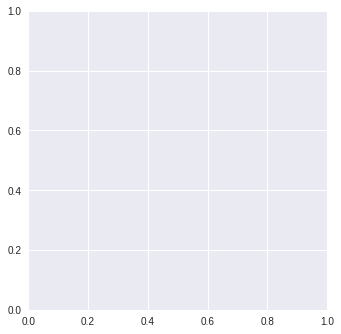

In [27]:
plt.imshow('samples/sample-10-s-m.png')

In [30]:
!wget https://github.com/andersy005/colaboratory-tools/blob/master/pytorch-install.sh

--2018-04-11 00:14:59--  https://github.com/andersy005/colaboratory-tools/blob/master/pytorch-install.sh
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘pytorch-install.sh’

pytorch-install.sh      [ <=>                ]  34.18K  --.-KB/s    in 0.008s  

2018-04-11 00:14:59 (3.94 MB/s) - ‘pytorch-install.sh’ saved [34996]



In [31]:
!ls

1i1FTiyrgv8yGF8XCvABp8WdpWHpH3T5r  datalab     models		   wget-log
city_real			   gta	       pytorch-install.sh  wget-log.1
city.tar.gz			   gta.tar.gz  samples		   wget-log.2


In [32]:
!./pytorch-install.sh

/bin/sh: 1: ./pytorch-install.sh: Permission denied


In [33]:
!which bash

/bin/bash


In [34]:
!bash pytorch-install.sh

pytorch-install.sh: line 7: syntax error near unexpected token `newline'
pytorch-install.sh: line 7: `<!DOCTYPE html>'


fatal: destination path 'colaboratory-tools' already exists and is not an empty directory.
Installing packages
Finished installing Pytorch


In [0]:
import torch

In [40]:
torch.__version__

'0.3.0.post4'

In [41]:
torch.cuda.is_available()

True